In [31]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Task 1: Dataset Preparation & Analysis

In [32]:
with open("/Users/gbardaklis/Mini-Project-1/goemotions.json/goemotions.json") as f:
    data = json.load(f)

In [33]:
# importing the json file into a dataframe 
df = pd.DataFrame(data, columns = ['Post', 'Emotion', 'Sentiment'])
df

,Post,Emotion,Sentiment
0,That game hurt.,sadness,negative
1,"You do right, if you don't care then fuck 'em!",neutral,neutral
2,Man I love reddit.,love,positive
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,neutral
4,Right? Considering it’s such an important docu...,gratitude,positive
...,...,...,...
171815,"Well, I'm glad you're out of all that now. How...",joy,positive
171816,Everyone likes [NAME].,love,positive
171817,Well when you’ve imported about a gazillion of...,caring,positive
171818,That looks amazing,admiration,positive


In [34]:
postsDict = df['Post'].values.tolist()
postsDict

['That game hurt.',
 "You do right, if you don't care then fuck 'em!",
 'Man I love reddit.',
 '[NAME] was nowhere near them, he was by the Falcon. ',
 'Right? Considering it’s such an important document, I should know the damned thing backwards and forwards... thanks again for the help!',
 "He isn't as big, but he's still quite popular. I've heard the same thing about his content. Never watched him much.",
 "That's crazy; I went to a super [RELIGION] high school and I think I can remember 2 girls the entire 4 years that became teen moms.",
 "that's adorable asf",
 '"Sponge Blurb Pubs Quaw Haha GURR ha AAa!" finale is too real',
 "I have, and now that you mention it, I think that's what triggered my nostalgia. ",
 "I wanted to downvote this, but it's not your fault homie.",
 "BUT IT'S HER TURN! /s",
 'Build a wall? /jk',
 'One time my 1 stopped right in 91st, I was able to get a good photo of the platform since they have some lights along it.',
 'Well then I’d say you have a pretty goo

In [35]:
# Returns the count of all 28 emotions, and stores it in countEmotions
countEmotions = df['Emotion'].value_counts()
# Turning the counts into a dictionary of pairs 
emotionsDict = countEmotions.to_dict()
# emotionsDict

In [36]:
# Returns the count of all 4 sentiments, and stores it in countSentiments
countSentiments = df['Sentiment'].value_counts()
# Turning the sentiment count into a dictionary of pairs 
sentimentsDict = countSentiments.to_dict()
# sentimentsDict

In [37]:
# # Stores emotions into a list
# emotion = df['Emotion'].tolist()
# # Removes emotions duplicate from the list
# emotion = list(dict.fromkeys(emotion))

In [38]:
# # Stores sentiments into a list
# sentiment = df['Sentiment'].tolist()
# # Removes sentiments duplicate from the list
# sentiment = list(dict.fromkeys(sentiment))

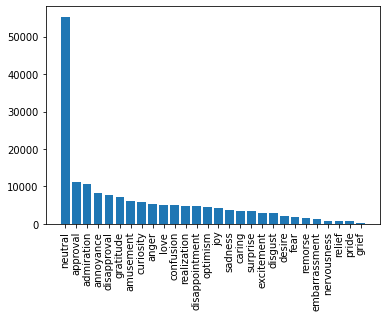

<Figure size 432x288 with 0 Axes>

In [39]:
# Printing histogram for emotions
plt.bar(emotionsDict.keys(), emotionsDict.values())
# 90 degree roration on x-axis labels
plt.xticks(rotation = 90)
plt.show()
plt.savefig('emotion-plot.pdf')

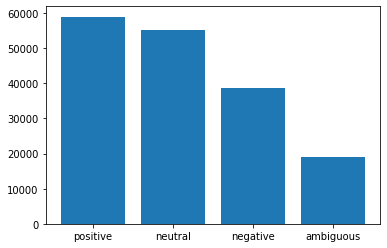

<Figure size 432x288 with 0 Axes>

In [40]:
# Printing sentiments in histogram
plt.bar(sentimentsDict.keys(), sentimentsDict.values())
plt.show()
plt.savefig('sentiment-plot.png')

# Task 2: Words as Features

In [47]:
# 2.1 --display the number of tokens (the size of the vocabulary) in the dataset

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(postsDict)
print(f'The size of the vocabulary is {vectorizer.get_feature_names_out().shape[0]} words.')

The size of the vocabulary is 30449 words.


In [62]:
# 2.2 --split the dataset into 80% for training and 20% for testing
post_train, post_test,emotion_train, emotion_test, sentiment_train, sentiment_test = train_test_split(df['Post'],df['Emotion'], df['Sentiment'], test_size=0.2, train_size=0.8)
print(post_train.shape[0])
print(post_test.shape[0])
print(emotion_train.shape[0])
print(emotion_test.shape[0])
print(sentiment_train.shape[0])
print(sentiment_test.shape[0])

137456
34364
137456
34364
137456
34364


In [ ]:
# 2.3 --train and test for both the emotion and sentiment classification using word frequency as features

In [76]:
#fit and transform emotion training data
vect = CountVectorizer()
emotion_train_dtm = vect.fit_transform(emotion_train)
emotion_train_dtm

<137456x4 sparse matrix of type '<class 'numpy.int64'>'
	with 137456 stored elements in Compressed Sparse Row format>

In [75]:
#fit and transform sentiment training data
sentiment_train_dtm = vect.fit_transform(sentiment_train)
sentiment_train_dtm

<137456x4 sparse matrix of type '<class 'numpy.int64'>'
	with 137456 stored elements in Compressed Sparse Row format>

In [77]:
#fit and transform emotion testing data
vect = CountVectorizer()
emotion_test_dtm = vect.fit_transform(emotion_test)
emotion_test_dtm

<34364x28 sparse matrix of type '<class 'numpy.int64'>'
	with 34364 stored elements in Compressed Sparse Row format>

In [78]:
#fit and transform sentiment testing data
sentiment_test_dtm = vect.fit_transform(sentiment_test)
sentiment_test_dtm

<34364x4 sparse matrix of type '<class 'numpy.int64'>'
	with 34364 stored elements in Compressed Sparse Row format>

In [110]:
# 2.3.1 --Base-MNB with the default parameters
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
%time classifier.fit(emotion_train_dtm, sentiment_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# make predictions for sentiment_test
sentiment_pred_class = classifier.predict(emotion_test_dtm)

# calculate accuracy for sentiment test
from sklearn import metrics
metrics.accuracy_score(sentiment_test, sentiment_pred_class)

# class distributions for sentiment_test
print(sentiment_test.value_counts())

# null accuracy for sentiment_test
null_accuracy = sentiment_test.value_counts().head(1) / len(sentiment_test)
print('Null Accuracy: ', null_accuracy)

# print confusion matrix for sentiment_test
# metrics.confusion_matrix(sentiment_test, sentiment_pred_class)


# sentiment_pred_prob = classifier.predict_proba(emotion_test_dtm)[:,1]
# sentiment_pred_prob


CPU times: user 1.78 s, sys: 43.9 ms, total: 1.82 s
Wall time: 1.88 s
positive     11780
neutral      11041
negative      7709
ambiguous     3834
Name: Sentiment, dtype: int64
Null Accuracy:  positive    0.342801
Name: Sentiment, dtype: float64
